In [1]:
from nlp_preprocess import nlp_data

data_loader = nlp_data()
data_loader.preprocess()
data = data_loader.get_dataframe()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ma0me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ma0me\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data.head()

,label,title,text,subject,date,clean_text
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",washington reuters trump campaign adviser geor...
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",seattlewashington reuters president donald tru...


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text'], data['label'], test_size=0.2, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [6]:
import pickle

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [7]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred_lr = lr.predict(X_test_tfidf)
print("\n🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))


🔹 Logistic Regression Results:
Accuracy: 0.9896842370109448
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3970
           1       0.99      0.99      0.99      3979

    accuracy                           0.99      7949
   macro avg       0.99      0.99      0.99      7949
weighted avg       0.99      0.99      0.99      7949



In [9]:
scores = cross_val_score(lr, X_train_tfidf, y_train, cv=5, scoring='accuracy')

print("\n🔹 Cross-Validation Results:")
print("Mean Accuracy:", scores.mean())
print("Accuracy per Fold:", scores)


🔹 Cross-Validation Results:
Mean Accuracy: 0.9884877370616187
Accuracy per Fold: [0.98537506 0.98946375 0.99103492 0.98741743 0.98914753]


In [10]:
import pickle

with open("classical_model.pkl", "wb") as f:
    pickle.dump(lr, f)

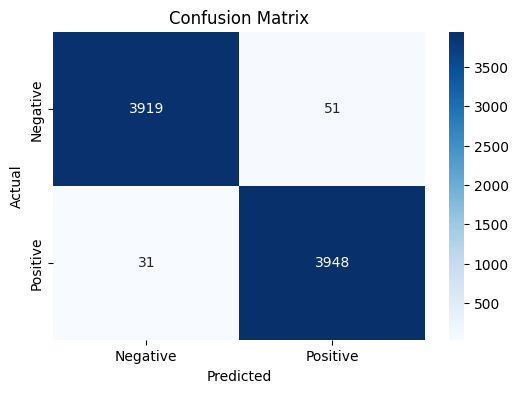

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
